# RESUMÃO ÚLTIMA AULA

**Modelo Resnet sem TOP**

In [43]:
modelo_resnet_semtop = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [44]:
for layer in modelo_resnet_semtop.layers:
    layer.trainable = False

In [45]:
num_classes = 2

In [46]:
from tensorflow.keras import layers, models

modelo_base = models.Sequential()
modelo_base.add(modelo_resnet_semtop)
modelo_base.add(layers.GlobalAveragePooling2D())
modelo_base.add(layers.Dense(1024, activation = 'relu'))
modelo_base.add(layers.Dropout(0.5))
modelo_base.add(layers.Dense(num_classes, activation = 'softmax'))

modelo_base.trainable = False

In [47]:
modelo_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
path ='E:/Harley/visao_am/potatochips/potato_chips/'

In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [50]:
train_datagen = ImageDataGenerator(
                                    preprocessing_function=preprocess_input,
                                    rescale=0.255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.2)

In [51]:
train_generator = train_datagen.flow_from_directory(
    path + 'Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    path + 'Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 616 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


In [52]:
history = modelo_base.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
19/19 [==============================] - 60s 3s/step - loss: 0.7358 - accuracy: 0.6062 - val_loss: 0.6417 - val_accuracy: 0.6016
Epoch 2/10
19/19 [==============================] - 42s 2s/step - loss: 0.7931 - accuracy: 0.5445 - val_loss: 0.6027 - val_accuracy: 0.6562
Epoch 3/10
19/19 [==============================] - 42s 2s/step - loss: 0.7861 - accuracy: 0.5702 - val_loss: 0.6428 - val_accuracy: 0.5938
Epoch 4/10
19/19 [==============================] - 42s 2s/step - loss: 0.7678 - accuracy: 0.5548 - val_loss: 0.6289 - val_accuracy: 0.6484
Epoch 5/10
19/19 [==============================] - 42s 2s/step - loss: 0.7951 - accuracy: 0.5702 - val_loss: 0.6105 - val_accuracy: 0.6719
Epoch 6/10
19/19 [==============================] - 43s 2s/step - loss: 0.8141 - accuracy: 0.5411 - val_loss: 0.6001 - val_accuracy: 0.6719
Epoch 7/10
19/19 [==============================] - 43s 2s/step - loss: 0.8003 - accuracy: 0.5599 - val_loss: 0.6197 - val_accuracy: 0.6172
Epoch 8/10
19/19 [==

In [64]:
modelo_base.save(path + 'resnet_10epochs.keras')

**Tentativa com modelo Mobile Net**

In [53]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [54]:
path ='E:/Harley/visao_am/potatochips/potato_chips/'

In [55]:
train_datagen = ImageDataGenerator(
                                    preprocessing_function=preprocess_input,
                                    rescale=0.255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    path + 'Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'training'
)

validation_generator = train_datagen.flow_from_directory(
    path + 'Train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    subset = 'validation'
)

Found 616 images belonging to 2 classes.
Found 153 images belonging to 2 classes.


In [56]:
modelo_base = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [57]:
modelo_base_mob = Sequential([
    modelo_base,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

modelo_base.trainable=False

In [58]:
modelo_base_mob.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = modelo_base_mob.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=2,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size
)

Epoch 1/2
19/19 [==============================] - 35s 2s/step - loss: 0.3398 - accuracy: 0.8801 - val_loss: 0.0465 - val_accuracy: 0.9844
Epoch 2/2
19/19 [==============================] - 32s 2s/step - loss: 0.0189 - accuracy: 0.9932 - val_loss: 0.0174 - val_accuracy: 1.0000


In [65]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [60]:
test_generator = train_datagen.flow_from_directory(
    path + 'Test',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False
)


Found 176 images belonging to 2 classes.


In [61]:
test_loss, test_accuracy = modelo_base_mob.evaluate(test_generator)

6/6 [==============================] - 9s 2s/step - loss: 0.0152 - accuracy: 0.9943


In [63]:
modelo_base_mob.save(path + 'mobilenet_2epoch.keras')

# Início aula 08

**Utilizando Resnet**

In [66]:
path = 'E:/Harley/visao_am/imagens_visao_am/'

In [68]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

In [69]:
modelo = ResNet50(weights='imagenet')

In [72]:
img = path+'tucano3.png'
img = image.load_img(img, target_size=(224, 224))

In [ ]:
plt.imshow(img)

In [73]:
img_p = image.img_to_array(img)
img_p = np.expand_dims(img_p, axis=0)
imp_p = preprocess_input(img_p)

In [75]:
preds = modelo.predict(imp_p)

1/1 [==============================] - 1s 798ms/step


In [76]:
print('Predição: ', decode_predictions(preds, top=5)[0])

35363/35363 [==============================] - 0s 3us/step
Predição:  [('n01843383', 'toucan', 0.92958796), ('n01829413', 'hornbill', 0.054402035), ('n01828970', 'bee_eater', 0.00351861), ('n01820546', 'lorikeet', 0.0030587183), ('n01818515', 'macaw', 0.0013807489)]


# Exercício Outros Modelos

**Modelo InceptioResNetV2**

In [223]:
path = 'E:/Harley/visao_am/imagens_visao_am/'

In [224]:
import tensorflow as tf
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [225]:
modeloIRN = InceptionResNetV2(weights='imagenet')

**Imagem 0**

In [226]:
img = path+'arara2.jpg'
img = image.load_img(img, target_size=(299, 299))

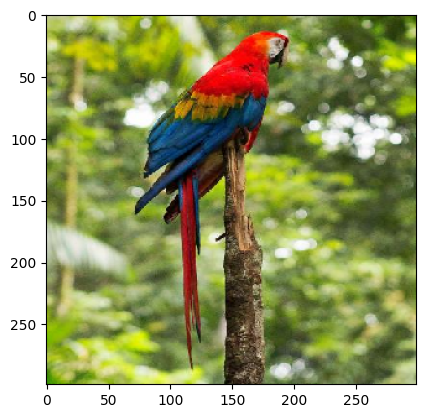

In [227]:
plt.imshow(img)

In [232]:
img_p = image.img_to_array(img)
img_p = np.expand_dims(img_p, axis=0)
imp_p = preprocess_input(img_p)

In [233]:
preds = modeloIRN.predict(imp_p)

1/1 [==============================] - 2s 2s/step


In [234]:
print('Predição: ', decode_predictions(preds, top=3)[0])

Predição:  [('n01818515', 'macaw', 0.9704093), ('n01820546', 'lorikeet', 0.00046321357), ('n04501370', 'turnstile', 0.00039630372)]


**Imagem 1**

In [97]:
img1 = path+'Costa Rican Frog.jpg'
img1 = image.load_img(img1, target_size=(299, 299))

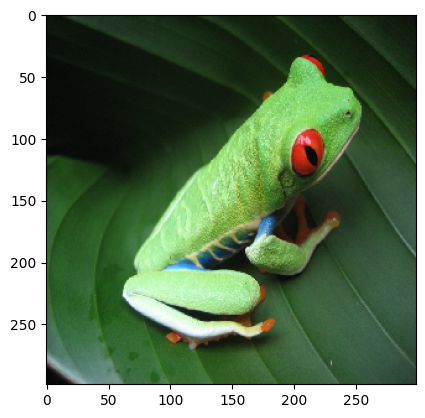

In [98]:
plt.imshow(img1)

In [99]:
img_p1 = image.img_to_array(img1)
img_p1 = np.expand_dims(img_p1, axis=0)
imp_p1 = preprocess_input(img_p1)

In [100]:
preds = modelo.predict(imp_p1)

1/1 [==============================] - 0s 135ms/step


In [101]:
print('Predição: ', decode_predictions(preds, top=3)[0])

Predição:  [('n01644373', 'tree_frog', 0.8846198), ('n01644900', 'tailed_frog', 0.013564402), ('n01641577', 'bullfrog', 0.0011900505)]


**Imagem 2**

In [103]:
img2 = path+'mico-leao2.jpg'
img2 = image.load_img(img2, target_size=(299, 299))

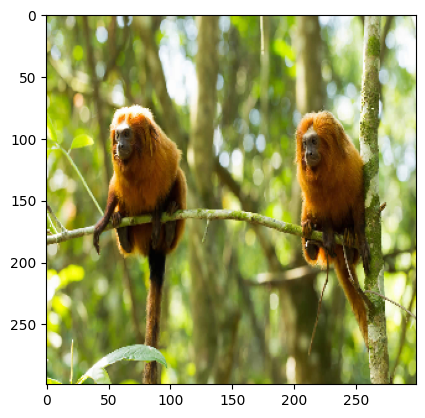

In [105]:
plt.imshow(img2)

In [106]:
img_p2 = image.img_to_array(img2)
img_p2 = np.expand_dims(img_p2, axis=0)
imp_p2 = preprocess_input(img_p2)

In [107]:
preds = modelo.predict(imp_p2)

1/1 [==============================] - 0s 128ms/step


In [108]:
print('Predição: ', decode_predictions(preds, top=3)[0])

Predição:  [('n02490219', 'marmoset', 0.7115446), ('n02493509', 'titi', 0.20642257), ('n02492035', 'capuchin', 0.0027467918)]


**Imagem 3**

In [111]:
img3 = path+'taj_mahal_ruido.jpg'
img3 = image.load_img(img3, target_size=(299, 299))

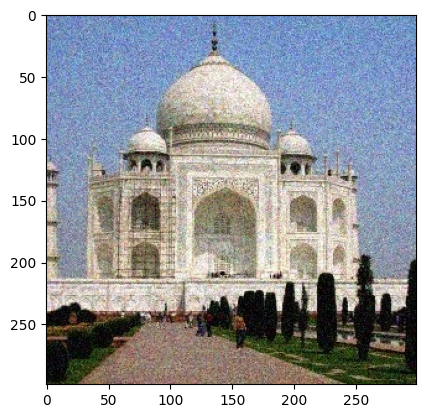

In [112]:
plt.imshow(img3)

In [113]:
img_p3 = image.img_to_array(img3)
img_p3 = np.expand_dims(img_p3, axis=0)
imp_p3 = preprocess_input(img_p3)

In [115]:
preds = modelo.predict(imp_p3)

1/1 [==============================] - 0s 129ms/step


In [116]:
print('Predição: ', decode_predictions(preds, top=3)[0])

Predição:  [('n03788195', 'mosque', 0.84441376), ('n03220513', 'dome', 0.009892507), ('n03877845', 'palace', 0.008919434)]


**Imagem 4**

In [117]:
img4 = path+'elefante.jpg'
img4 = image.load_img(img4, target_size=(299, 299))

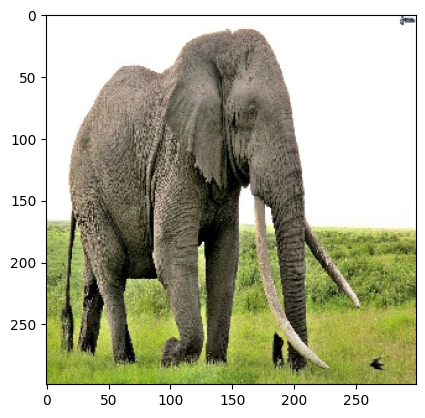

In [118]:
plt.imshow(img4)

In [119]:
img_p4 = image.img_to_array(img4)
img_p4 = np.expand_dims(img_p4, axis=0)
imp_p4 = preprocess_input(img_p4)

In [120]:
preds = modelo.predict(imp_p4)

1/1 [==============================] - 0s 135ms/step


In [121]:
print('Predição: ', decode_predictions(preds, top=3)[0])

Predição:  [('n01871265', 'tusker', 0.72449774), ('n02504013', 'Indian_elephant', 0.15271242), ('n02504458', 'African_elephant', 0.060496747)]


**Modelo EfficientNetB7**

In [235]:
path = 'E:/Harley/visao_am/imagens_visao_am/'

In [236]:
import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB7, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [237]:
modeloENB = EfficientNetB7 (weights='imagenet')

**Imagem 0**

In [238]:
img = path+'arara2.jpg'
img = image.load_img(img, target_size=(600, 600))

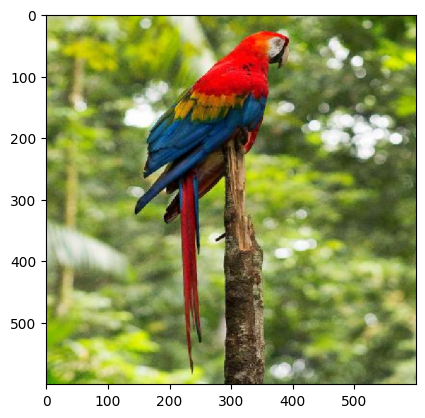

In [239]:
plt.imshow(img)

In [240]:
img_p = image.img_to_array(img)
img_p = np.expand_dims(img_p, axis=0)
imp_p = preprocess_input(img_p)

In [241]:
predsm2img0 = modeloENB.predict(imp_p)

1/1 [==============================] - 4s 4s/step


In [242]:
print('Predição: ', decode_predictions(predsm2img0, top=3)[0])

Predição:  [('n01818515', 'macaw', 0.8465619), ('n01828970', 'bee_eater', 0.0010460629), ('n01843065', 'jacamar', 0.0009055199)]


**Imagem 1**

In [143]:
img1 = path+'Costa Rican Frog.jpg'
img1 = image.load_img(img1, target_size=(600, 600))

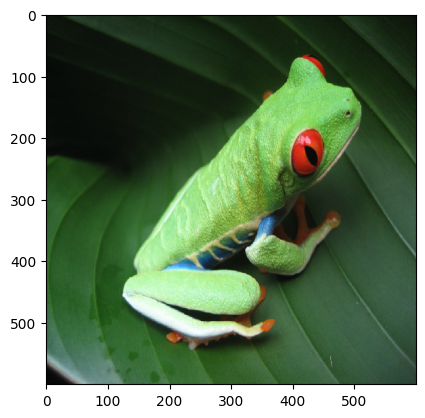

In [144]:
plt.imshow(img1)

In [145]:
img_p1 = image.img_to_array(img1)
img_p1 = np.expand_dims(img_p1, axis=0)
imp_p1 = preprocess_input(img_p1)

In [146]:
predsm2img1 = modelo.predict(imp_p1)

1/1 [==============================] - 1s 555ms/step


In [147]:
print('Predição: ', decode_predictions(predsm2img1, top=3)[0])

Predição:  [('n01644373', 'tree_frog', 0.8120731), ('n01644900', 'tailed_frog', 0.029504592), ('n01641577', 'bullfrog', 0.001103778)]


**Imagem 2**

In [148]:
img2 = path+'mico-leao2.jpg'
img2 = image.load_img(img2, target_size=(600, 600))

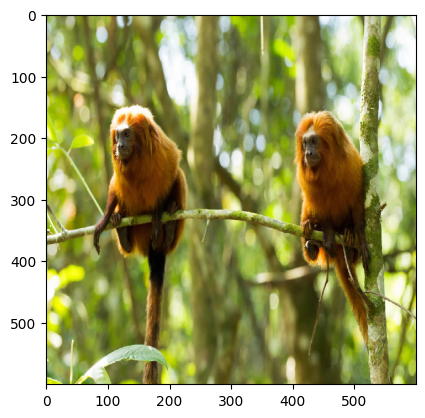

In [149]:
plt.imshow(img2)

In [150]:
img_p2 = image.img_to_array(img2)
img_p2 = np.expand_dims(img_p2, axis=0)
imp_p2 = preprocess_input(img_p2)

In [155]:
predsm2img2 = modelo.predict(imp_p2)

1/1 [==============================] - 1s 555ms/step


In [156]:
print('Predição: ', decode_predictions(predsm2img2, top=3)[0])

Predição:  [('n02493509', 'titi', 0.50839937), ('n02492660', 'howler_monkey', 0.0980294), ('n02490219', 'marmoset', 0.06756127)]


**Imagem 3**

In [157]:
img3 = path+'taj_mahal_ruido.jpg'
img3 = image.load_img(img3, target_size=(600, 600))

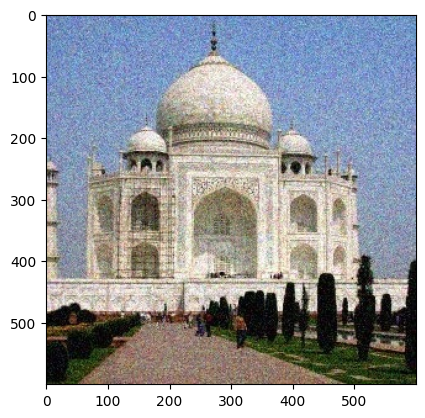

In [158]:
plt.imshow(img3)

In [159]:
img_p3 = image.img_to_array(img3)
img_p3 = np.expand_dims(img_p3, axis=0)
imp_p3 = preprocess_input(img_p3)

In [160]:
predsm2img3 = modelo.predict(imp_p3)

1/1 [==============================] - 1s 563ms/step


In [161]:
print('Predição: ', decode_predictions(predsm2img3, top=3)[0])

Predição:  [('n03788195', 'mosque', 0.8381663), ('n03220513', 'dome', 0.0063939947), ('n03877845', 'palace', 0.005460961)]


**Imagem 4**

In [162]:
img4 = path+'elefante.jpg'
img4 = image.load_img(img4, target_size=(600, 600))

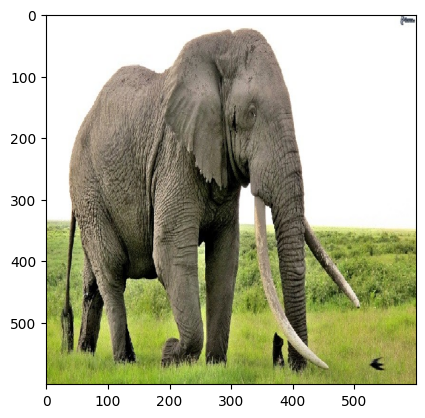

In [163]:
plt.imshow(img4)

In [164]:
img_p4 = image.img_to_array(img4)
img_p4 = np.expand_dims(img_p4, axis=0)
imp_p4 = preprocess_input(img_p4)

In [165]:
predsm2img4 = modelo.predict(imp_p4)

1/1 [==============================] - 1s 560ms/step


In [166]:
print('Predição: ', decode_predictions(predsm2img4, top=3)[0])

Predição:  [('n01871265', 'tusker', 0.5093234), ('n02504458', 'African_elephant', 0.16719395), ('n02504013', 'Indian_elephant', 0.08644089)]


**Modelo Xception**

In [167]:
path = 'E:/Harley/visao_am/imagens_visao_am/'

In [168]:
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception , preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [169]:
modeloXception = Xception(weights='imagenet')

91884032/91884032 [==============================] - 21s 0us/step


**Imagem 0**

In [174]:
img = path+'arara2.jpg'
img = image.load_img(img, target_size=(299, 299))

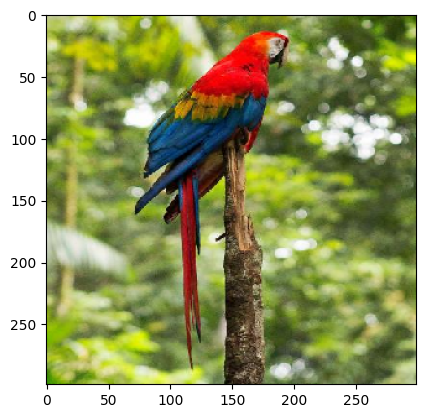

In [175]:
plt.imshow(img)

In [176]:
img_p = image.img_to_array(img)
img_p = np.expand_dims(img_p, axis=0)
imp_p = preprocess_input(img_p)

In [177]:
predsm3img0 = modeloXception.predict(imp_p)

1/1 [==============================] - 1s 641ms/step


In [178]:
print('Predição: ', decode_predictions(predsm3img0, top=3)[0])

Predição:  [('n01818515', 'macaw', 0.9615355), ('n01828970', 'bee_eater', 0.0034646336), ('n01537544', 'indigo_bunting', 0.0022637723)]


**Imagem 1**

In [179]:
img1 = path+'Costa Rican Frog.jpg'
img1 = image.load_img(img1, target_size=(299, 299))

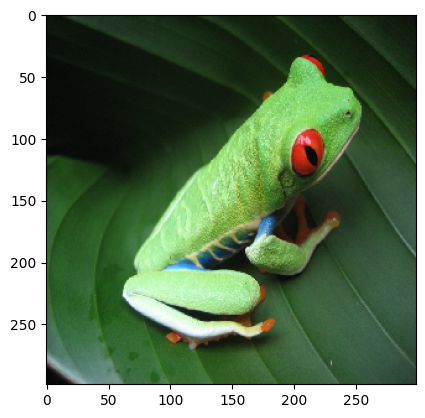

In [180]:
plt.imshow(img1)

In [181]:
img_p1 = image.img_to_array(img1)
img_p1 = np.expand_dims(img_p1, axis=0)
imp_p1 = preprocess_input(img_p1)

In [182]:
predsm3img1 = modeloXception.predict(imp_p1)

1/1 [==============================] - 0s 139ms/step


In [184]:
print('Predição: ', decode_predictions(predsm3img1, top=3)[0])

Predição:  [('n01644373', 'tree_frog', 0.96962345), ('n01644900', 'tailed_frog', 0.015706528), ('n01641577', 'bullfrog', 0.0002457157)]


**Imagem 2**

In [185]:
img2 = path+'mico-leao2.jpg'
img2 = image.load_img(img2, target_size=(299, 299))

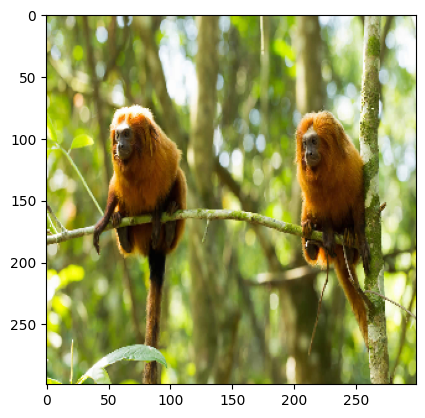

In [186]:
plt.imshow(img2)

In [187]:
img_p2 = image.img_to_array(img2)
img_p2 = np.expand_dims(img_p2, axis=0)
imp_p2 = preprocess_input(img_p2)

In [188]:
predsm3img2 = modeloXception.predict(imp_p2)

1/1 [==============================] - 0s 75ms/step


In [189]:
print('Predição: ', decode_predictions(predsm3img2, top=3)[0])

Predição:  [('n02493509', 'titi', 0.930529), ('n02490219', 'marmoset', 0.051236574), ('n02492660', 'howler_monkey', 0.0061104367)]


**Imagem 3**

In [190]:
img3 = path+'taj_mahal_ruido.jpg'
img3 = image.load_img(img3, target_size=(299, 299))

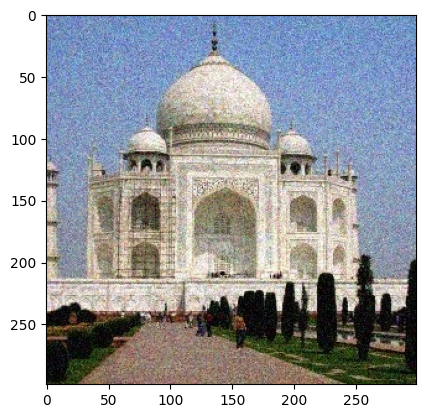

In [191]:
plt.imshow(img3)

In [192]:
img_p3 = image.img_to_array(img3)
img_p3 = np.expand_dims(img_p3, axis=0)
imp_p3 = preprocess_input(img_p3)

In [198]:
predsm3img3 = modeloXception.predict(imp_p3)

1/1 [==============================] - 0s 96ms/step


In [199]:
print('Predição: ', decode_predictions(predsm3img3, top=3)[0])

Predição:  [('n03788195', 'mosque', 0.96277624), ('n03877845', 'palace', 0.015020277), ('n03220513', 'dome', 0.0017303852)]


**Imagem 4**

In [195]:
img4 = path+'elefante.jpg'
img4 = image.load_img(img4, target_size=(299, 299))

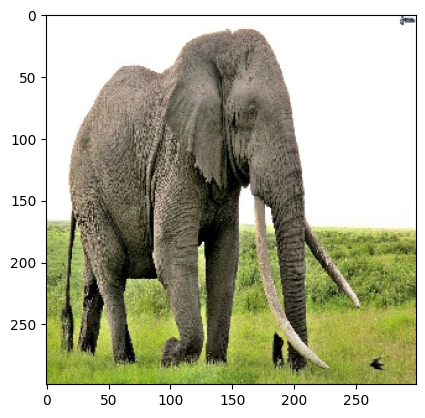

In [196]:
plt.imshow(img4)

In [197]:
img_p4 = image.img_to_array(img4)
img_p4 = np.expand_dims(img_p4, axis=0)
imp_p4 = preprocess_input(img_p4)

In [200]:
predsm3img4 = modeloXception.predict(imp_p4)

1/1 [==============================] - 0s 81ms/step


In [201]:
print('Predição: ', decode_predictions(predsm3img4, top=3)[0])

Predição:  [('n01871265', 'tusker', 0.7196183), ('n02504458', 'African_elephant', 0.14504057), ('n02504013', 'Indian_elephant', 0.08593628)]


# Continuação Aula

In [250]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [251]:
num_classes = 2

In [252]:
modelo_base = ResNet50(weights = 'imagenet', include_top = False, input_shape=(224,224,3))

In [253]:
for layer in modelo_base.layers:
    layer.trainable = False

In [254]:
modelo = tf.keras.Sequential(
    [modelo_base,
     GlobalAveragePooling2D(),
     Dense(1024, activation = 'relu'),
     Dense(num_classes, activation = 'softmax')
    ])

In [255]:
modelo.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [257]:
path = 'E:/Harley/visao_am/dc_small/'

In [259]:
def cria_dataframe(caminho):
    arquivos = []
    rotulos = []
    for arquivo in os.listdir(caminho):
        if arquivo.startswith('cat'):
            rotulos.append('cat')
        elif arquivo.startswith('dog'):
            rotulos.append('dog')
        arquivos.append(arquivo)
    return pd.DataFrame({'arquivo': arquivos, 'rotulo': rotulos})
    

In [260]:
df_dados = cria_dataframe(os.path.join(path, 'train'))

In [265]:
train_df, validation_df = train_test_split(df_dados, test_size = 0.2, stratify = df_dados['rotulo'])

In [266]:
test_df = cria_dataframe(os.path.join(path, 'test'))

In [268]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [273]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    directory=os.path.join(path, 'train'),
    x_col = 'arquivo',
    y_col = 'rotulo',
    target_size=(224, 224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 1600 validated image filenames belonging to 2 classes.


In [274]:
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    directory=os.path.join(path, 'train'),
    x_col = 'arquivo',
    y_col = 'rotulo',
    target_size=(224, 224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 400 validated image filenames belonging to 2 classes.


In [275]:
test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=os.path.join(path, 'test'),
    x_col = 'arquivo',
    y_col = 'rotulo',
    target_size=(224, 224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 1000 validated image filenames belonging to 2 classes.


In [276]:
modelo.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // validation_generator.batch_size,
    epochs = 2
)

Epoch 1/2
25/25 [==============================] - 54s 2s/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0555 - val_accuracy: 0.9740
Epoch 2/2
25/25 [==============================] - 59s 2s/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0382 - val_accuracy: 0.9844


In [277]:
test_loss, test_accuracy = modelo.evaluate(test_generator, steps = test_generator.samples // test_generator.batch_size)
print(f'Acurácia no teste: {test_accuracy}')

15/15 [==============================] - 29s 2s/step - loss: 0.0440 - accuracy: 0.9854
Acurácia no teste: 0.9854166507720947


# Exercício 2

## Classe Gato

**Imagem 0**

In [279]:
path1 = 'E:/Harley/visao_am/dc_small/infe/'

In [317]:
img = path1+'cat3.jfif'
img = image.load_img(img, target_size=(224, 224))

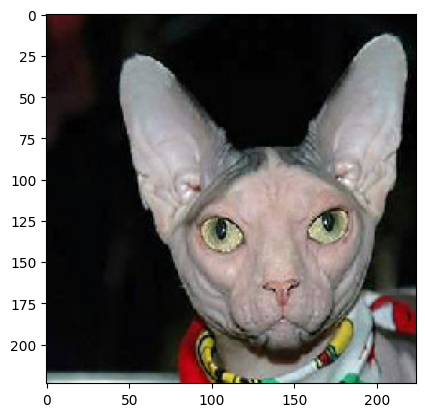

In [318]:
plt.imshow(img)

In [319]:
img_p = image.img_to_array(img)
img_p = np.expand_dims(img_p, axis=0)
imp_p = preprocess_input(img_p)

In [320]:
preds = modelo.predict(imp_p)
resultado_classe = np.argmax(preds[0])

1/1 [==============================] - 0s 66ms/step


In [321]:
classes = ['cat', 'dog',]

In [322]:
print('Predição: ', classes[resultado_classe])

Predição:  cat


**Imagem 1**

In [323]:
path1 = 'E:/Harley/visao_am/dc_small/infe/'

In [324]:
img = path1+'cat1.jpg'
img = image.load_img(img, target_size=(224, 224))

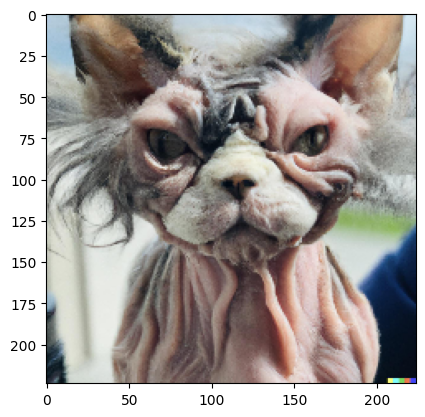

In [325]:
plt.imshow(img)

In [326]:
img_p = image.img_to_array(img)
img_p = np.expand_dims(img_p, axis=0)
imp_p = preprocess_input(img_p)

In [327]:
preds = modelo.predict(imp_p)
resultado_classe = np.argmax(preds[0])

1/1 [==============================] - 0s 77ms/step


In [328]:
classes = ['cat', 'dog',]

In [329]:
print('Predição: ', classes[resultado_classe])

Predição:  cat


## Classe Cachorro

**Imagem 0**

In [330]:
path1 = 'E:/Harley/visao_am/dc_small/infe/'

In [331]:
img = path1+'cac3.jfif'
img = image.load_img(img, target_size=(224, 224))

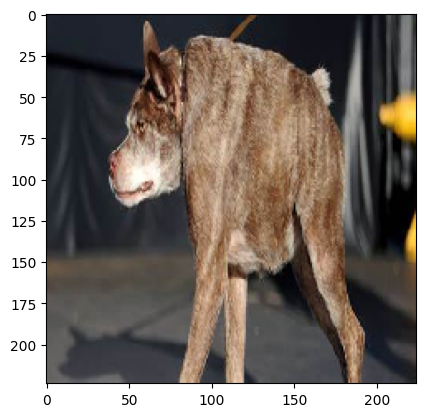

In [332]:
plt.imshow(img)

In [333]:
img_p = image.img_to_array(img)
img_p = np.expand_dims(img_p, axis=0)
imp_p = preprocess_input(img_p)

In [334]:
preds = modelo.predict(imp_p)
resultado_classe = np.argmax(preds[0])

1/1 [==============================] - 0s 78ms/step


In [335]:
classes = ['cat', 'dog',]

In [336]:
print('Predição: ', classes[resultado_classe])

Predição:  dog


**Imagem 1**

In [337]:
path1 = 'E:/Harley/visao_am/dc_small/infe/'

In [338]:
img = path1+'cac1.jfif'
img = image.load_img(img, target_size=(224, 224))

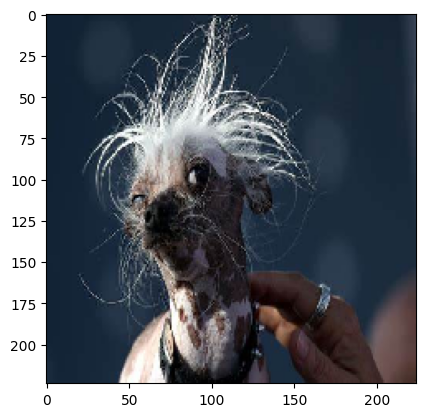

In [339]:
plt.imshow(img)

In [340]:
img_p = image.img_to_array(img)
img_p = np.expand_dims(img_p, axis=0)
imp_p = preprocess_input(img_p)

In [341]:
preds = modelo.predict(imp_p)
resultado_classe = np.argmax(preds[0])

1/1 [==============================] - 0s 85ms/step


In [342]:
classes = ['cat', 'dog',]

In [343]:
print('Predição: ', classes[resultado_classe])

Predição:  dog
